<h1> Company Classifier </h1>

<h3>Importing Libraries</h3>

The first step for every code assignment is to import all the necessary libraries. Personally, I like to dedicate a cell specifically for importing libraries and add them as I work and discover additional requirements.

In [19]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import geonamescache
from collections import Counter

<h2>Preparing the data</h2>

<h3>Loading the Data</h3>

First, we load the dataset into a pandas DataFrame to prepare it for our model. The data is read from the CSV file located in *CSV/Data*. We then take a quick look at its structure and content to understand it better.

In [20]:
data = pd.read_csv("CSV/Data/ml_insurance_challenge.csv",encoding="ISO-8859-1")

print(data.shape)

data.head()

(9494, 5)


,description,business_tags,sector,category,niche
0,"Welchcivils is a civil engineering and construction company that specializes in designing and building utility network connections across the UK. They offer multi-utility solutions that combine electricity, gas, water, and fibre optic installation into a single contract. Their design engineer teams are capable of designing electricity, water and gas networks from existing network connection points to meter locations at the development, as well as project management of reinforcements and diversions. They provide custom connection solutions that take into account any existing assets, maximize the usage of every trench, and meet project deadlines. Welchcivils has considerable expertise installing gas and electricity connections in a variety of market categories, including residential, commercial, and industrial projects, as as well.","['Construction Services', 'Multi-utilities', 'Utility Network Connections Design and Construction', 'Water Connection Installation', 'Multi-utility Connections', 'Fiber Optic Installation']",Services,Civil Engineering Services,Other Heavy and Civil Engineering Construction
1,"Kyoto Vegetable Specialists Uekamo, also known as Iwa-machi, is a company based in Kyoto, Japan that specializes in the sale of vegetables. They have been in business for ten years and offer a collection of vegetable recipes through their KeiÅ Vegetable Recipe Collection and Online Shop. The company is directly owned by Uekamoo Farm, Uekame Farm, and Lobechi Shijo-hara Farm. They offer a variety of vegetable products, including suguki-zuke and Kamoo eggplant, and also accept production cultivation according to customer requests. Iwaichi Limited Company uses their experience in production and sales to provide tailored vegetables to meet customer needs and also accepts cultivation of products according to their requirements.","['Wholesale', 'Dual-task Movement Products', 'Cast Iron Products Manufacturer', 'Manufacturing Technology', 'Food and Beverage', 'Rice And Noodles', 'High-quality Gloss of Cast Iron', 'Rice Wholesaler', 'Miscellaneous Crop Farming', 'Health and Wellness Products', 'Agricultural Cooperative', 'Medical Practice Based on Eastern Medicine', 'Production', 'Rice Pudding']",Manufacturing,Fruit & Vegetable - Markets & Stores,"Frozen Fruit, Juice, and Vegetable Manufacturing"
2,"Loidholdhof Integrative Hofgemeinschaft is a company that offers a range of services and products to its customers. Their products are all handmade and of the highest quality, produced on a biodynamic basis with a focus on freshness and quality. The company's product range includes homemade bread, honey from their own beekeeping, syrup, and fresh vegetables, which can be purchased in their farm shop. In addition to their farm products, they also have a farm shop and cafe where customers can enjoy fresh coffee and delicious cakes.","['Living Forms', 'Farm Cafe', 'Fresh Coffee', 'Community Engagement', 'Freshly Baked Bread', 'Social Interaction Opportunities', 'Fresh Vegetables', 'Homemade Honey', 'Delicious Cakes', 'Community-oriented Living', 'Handmade Products', 'Fresh Juices', 'Farm Fresh Products', 'Integrated Farming Community', 'Biodynamic Farming']",Manufacturing,Farms & Agriculture Production,All Other Miscellaneous Crop Farming
3,"PATAGONIA Chapa Y Pintura is an auto body shop located in Comodoro Rivadavia, Chubut Province, Argentina. The company specializes in providing auto body repair services.","['Automotive Body Repair Services', 'Interior Repair Services']",Services,Auto Body Shops,"Automotive Body, Paint, and Interior Repair and Maintenance"
4,"Stanica WODNA PTTK Swornegacie is a cultural establishment located in Swornychgaciach, Poland. It is a popular destination for kayakers and tourists of all levels, offering a variety of activities and events. The establishment is managed by Zbigniew GaliÅski.","['Cultural Activities', 'Accommodation Services', 'Kayak Rentals', 'Small

<h3>Removing the Punctuation</h3>

Then we start by removing the punctuation from all columns of the data to work better with every piece of information from the dataset.

In [21]:
string.punctuation

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

clean=data.copy()
clean['description'] = data['description'].apply(lambda x: remove_punctuation(str(x)))

clean['business_tags'] = data['business_tags'].apply(lambda x: remove_punctuation(str(x)))

clean['category'] = data['category'].apply(lambda x: remove_punctuation(str(x)))

clean['niche'] = data['niche'].apply(lambda x: remove_punctuation(str(x)))

clean.head()

,description,business_tags,sector,category,niche
0,Welchcivils is a civil engineering and construction company that specializes in designing and building utility network connections across the UK They offer multiutility solutions that combine electricity gas water and fibre optic installation into a single contract Their design engineer teams are capable of designing electricity water and gas networks from existing network connection points to meter locations at the development as well as project management of reinforcements and diversions They provide custom connection solutions that take into account any existing assets maximize the usage of every trench and meet project deadlines Welchcivils has considerable expertise installing gas and electricity connections in a variety of market categories including residential commercial and industrial projects as as well,Construction Services Multiutilities Utility Network Connections Design and Construction Water Connection Installation Multiutility Connections Fiber Optic Installation,Services,Civil Engineering Services,Other Heavy and Civil Engineering Construction
1,Kyoto Vegetable Specialists Uekamo also known as Iwamachi is a company based in Kyoto Japan that specializes in the sale of vegetables They have been in business for ten years and offer a collection of vegetable recipes through their KeiÅ Vegetable Recipe Collection and Online Shop The company is directly owned by Uekamoo Farm Uekame Farm and Lobechi Shijohara Farm They offer a variety of vegetable products including sugukizuke and Kamoo eggplant and also accept production cultivation according to customer requests Iwaichi Limited Company uses their experience in production and sales to provide tailored vegetables to meet customer needs and also accepts cultivation of products according to their requirements,Wholesale Dualtask Movement Products Cast Iron Products Manufacturer Manufacturing Technology Food and Beverage Rice And Noodles Highquality Gloss of Cast Iron Rice Wholesaler Miscellaneous Crop Farming Health and Wellness Products Agricultural Cooperative Medical Practice Based on Eastern Medicine Production Rice Pudding,Manufacturing,Fruit Vegetable Markets Stores,Frozen Fruit Juice and Vegetable Manufacturing
2,Loidholdhof Integrative Hofgemeinschaft is a company that offers a range of services and products to its customers Their products are all handmade and of the highest quality produced on a biodynamic basis with a focus on freshness and quality The companys product range includes homemade bread honey from their own beekeeping syrup and fresh vegetables which can be purchased in their farm shop In addition to their farm products they also have a farm shop and cafe where customers can enjoy fresh coffee and delicious cakes,Living Forms Farm Cafe Fresh Coffee Community Engagement Freshly Baked Bread Social Interaction Opportunities Fresh Vegetables Homemade Honey Delicious Cakes Communityoriented Living Handmade Products Fresh Juices Farm Fresh Products Integrated Farming Community Biodynamic Farming,Manufacturing,Farms Agriculture Production,All Other Miscellaneous Crop Farming
3,PATAGONIA Chapa Y Pintura is an auto body shop located in Comodoro Rivadavia Chubut Province Argentina The company specializes in providing auto body repair services,Automotive Body Repair Services Interior Repair Services,Services,Auto Body Shops,Automotive Body Paint and Interior Repair and Maintenance
4,Stanica WODNA PTTK Swornegacie is a cultural establishment located in Swornychgaciach Poland It is a popular destination for kayakers and tourists of all levels offering a variety of activities and events The establishment is managed by Zbigniew GaliÅski,Cultural Activities Accommodation Services Kayak Rentals Small Gastronomy Products Tourism Services Recreational Activities Cultural Center,Services,Boat Tours Cruises,Scenic and Sightseeing Transportation Water


<h3>Making Everything Lowercase</h3>

The next step is to apply the `lower()` function to eliminate uppercase characters. This ensures consistency and avoids potential issues caused by case sensitivity in subsequent processing steps.

In [22]:
clean = clean.applymap(lambda x: x.lower() if isinstance(x, str) else x)

clean.head()

C:\Users\anama_1lv\AppData\Local\Temp\ipykernel_28292\814097994.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean = clean.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,description,business_tags,sector,category,niche
0,welchcivils is a civil engineering and construction company that specializes in designing and building utility network connections across the uk they offer multiutility solutions that combine electricity gas water and fibre optic installation into a single contract their design engineer teams are capable of designing electricity water and gas networks from existing network connection points to meter locations at the development as well as project management of reinforcements and diversions they provide custom connection solutions that take into account any existing assets maximize the usage of every trench and meet project deadlines welchcivils has considerable expertise installing gas and electricity connections in a variety of market categories including residential commercial and industrial projects as as well,construction services multiutilities utility network connections design and construction water connection installation multiutility connections fiber optic installation,services,civil engineering services,other heavy and civil engineering construction
1,kyoto vegetable specialists uekamo also known as iwamachi is a company based in kyoto japan that specializes in the sale of vegetables they have been in business for ten years and offer a collection of vegetable recipes through their keiå vegetable recipe collection and online shop the company is directly owned by uekamoo farm uekame farm and lobechi shijohara farm they offer a variety of vegetable products including sugukizuke and kamoo eggplant and also accept production cultivation according to customer requests iwaichi limited company uses their experience in production and sales to provide tailored vegetables to meet customer needs and also accepts cultivation of products according to their requirements,wholesale dualtask movement products cast iron products manufacturer manufacturing technology food and beverage rice and noodles highquality gloss of cast iron rice wholesaler miscellaneous crop farming health and wellness products agricultural cooperative medical practice based on eastern medicine production rice pudding,manufacturing,fruit vegetable markets stores,frozen fruit juice and vegetable manufacturing
2,loidholdhof integrative hofgemeinschaft is a company that offers a range of services and products to its customers their products are all handmade and of the highest quality produced on a biodynamic basis with a focus on freshness and quality the companys product range includes homemade bread honey from their own beekeeping syrup and fresh vegetables which can be purchased in their farm shop in addition to their farm products they also have a farm shop and cafe where customers can enjoy fresh coffee and delicious cakes,living forms farm cafe fresh coffee community engagement freshly baked bread social interaction opportunities fresh vegetables homemade honey delicious cakes communityoriented living handmade products fresh juices farm fresh products integrated farming community biodynamic farming,manufacturing,farms agriculture production,all other miscellaneous crop farming
3,patagonia chapa y pintura is an auto body shop located in comodoro rivadavia chubut province argentina the company specializes in providing auto body repair services,automotive body repair services interior repair services,services,auto body shops,automotive body paint and interior repair and maintenance
4,stanica wodna pttk swornegacie is a cultural establishment located in swornychgaciach poland it is a popular destination for kayakers and tourists of all levels offering a variety of activities and events the establishment is managed by zbigniew galiåski,cultural activities accommodation services kayak rentals small gastronomy products tourism services recreational activities cultural center,services,boat tours cruises,scenic and sightseeing transportation water


<h3>Transforming Text into Arrays of Words</h3>

To simplify operations on the dataset, we need to transform the text data, which is currently in the form of strings, into arrays of words. This transformation allows us to perform operations such as removing unwanted words or processing each word individually.

In [23]:
clean['description'] = clean['description'].apply(lambda x: x.split() if isinstance(x, str) else x)

clean['business_tags'] = clean['business_tags'].apply(lambda x: x.split() if isinstance(x, str) else x)

clean['sector'] = clean['sector'].apply(lambda x: x.split() if isinstance(x, str) else x)

clean['category'] = clean['category'].apply(lambda x: x.split() if isinstance(x, str) else x)

clean['niche'] = clean['niche'].apply(lambda x: x.split() if isinstance(x, str) else x)

clean.head()    

,description,business_tags,sector,category,niche
0,"[welchcivils, is, a, civil, engineering, and, construction, company, that, specializes, in, designing, and, building, utility, network, connections, across, the, uk, they, offer, multiutility, solutions, that, combine, electricity, gas, water, and, fibre, optic, installation, into, a, single, contract, their, design, engineer, teams, are, capable, of, designing, electricity, water, and, gas, networks, from, existing, network, connection, points, to, meter, locations, at, the, development, as, well, as, project, management, of, reinforcements, and, diversions, they, provide, custom, connection, solutions, that, take, into, account, any, existing, assets, maximize, the, usage, of, every, trench, and, meet, project, deadlines, welchcivils, has, considerable, expertise, installing, gas, and, electricity, ...]","[construction, services, multiutilities, utility, network, connections, design, and, construction, water, connection, installation, multiutility, connections, fiber, optic, installation]",[services],"[civil, engineering, services]","[other, heavy, and, civil, engineering, construction]"
1,"[kyoto, vegetable, specialists, uekamo, also, known, as, iwamachi, is, a, company, based, in, kyoto, japan, that, specializes, in, the, sale, of, vegetables, they, have, been, in, business, for, ten, years, and, offer, a, collection, of, vegetable, recipes, through, their, keiå, vegetable, recipe, collection, and, online, shop, the, company, is, directly, owned, by, uekamoo, farm, uekame, farm, and, lobechi, shijohara, farm, they, offer, a, variety, of, vegetable, products, including, sugukizuke, and, kamoo, eggplant, and, also, accept, production, cultivation, according, to, customer, requests, iwaichi, limited, company, uses, their, experience, in, production, and, sales, to, provide, tailored, vegetables, to, meet, customer, needs, and, ...]","[wholesale, dualtask, movement, products, cast, iron, products, manufacturer, manufacturing, technology, food, and, beverage, rice, and, noodles, highquality, gloss, of, cast, iron, rice, wholesaler, miscellaneous, crop, farming, health, and, wellness, products, agricultural, cooperative, medical, practice, based, on, eastern, medicine, production, rice, pudding]",[manufacturing],"[fruit, vegetable, markets, stores]","[frozen, fruit, juice, and, vegetable, manufacturing]"
2,"[loidholdhof, integrative, hofgemeinschaft, is, a, company, that, offers, a, range, of, services, and, products, to, its, customers, their, products, are, all, handmade, and, of, the, highest, quality, produced, on, a, biodynamic, basis, with, a, focus, on, freshness, and, quality, the, companys, product, range, includes, homemade, bread, honey, from, their, own, beekeeping, syrup, and, fresh, vegetables, which, can, be, purchased, in, their, farm, shop, in, addition, to, their, farm, products, they, also, have, a, farm, shop, and, cafe, where, customers, can, enjoy, fresh, coffee, and, delicious, cakes]","[living, forms, farm, cafe, fresh, coffee, community, engagement, freshly, baked, bread, social, interaction, opportunities, fresh, vegetables, homemade, honey, delicious, cakes, communityoriented, living, handmade, products, fresh, juices, farm, fresh, products, integrated, farming, community, biodynamic, farming]",[manufacturing],"[farms, agriculture, production]","[all, other, miscellaneous, crop, farming]"
3,"[patagonia, chapa, y, pintura, is, an, auto, body, shop, located, in, comodoro, rivadavia, chubut, province, argentina, the, company, specializes, in, providing, auto, body, repair, services]","[automotive, body, repair, services, interior, repair, services]",[services],"[auto, body, shops]","[automotive, body, paint, and, interior, repair, and, maintenance]"
4,"[stanica, wodna, pttk, swornegacie, is, a, cultural, establishment, located, in, swornychgaciach, poland, it, is, a, popular, destination, for, kayakers, and, tourists, of, all, levels, offering, a, varie

<h3>Removing stopwords</h3>

Now we will remove the stopwords, which are common words ``("the", "is", "and", etc.)`` that do not contribute much to the meaning of the text. Removing these words helps in reducing noise and focusing on the more meaningful parts of the dataset.

In [24]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

clean['description'] = clean['description'].apply(remove_stopwords)
clean['business_tags'] = clean['business_tags'].apply(remove_stopwords)
clean['niche'] = clean['niche'].apply(remove_stopwords)

clean.head()


,description,business_tags,sector,category,niche
0,"[welchcivils, civil, engineering, construction, company, specializes, designing, building, utility, network, connections, across, uk, offer, multiutility, solutions, combine, electricity, gas, water, fibre, optic, installation, single, contract, design, engineer, teams, capable, designing, electricity, water, gas, networks, existing, network, connection, points, meter, locations, development, well, project, management, reinforcements, diversions, provide, custom, connection, solutions, take, account, existing, assets, maximize, usage, every, trench, meet, project, deadlines, welchcivils, considerable, expertise, installing, gas, electricity, connections, variety, market, categories, including, residential, commercial, industrial, projects, well]","[construction, services, multiutilities, utility, network, connections, design, construction, water, connection, installation, multiutility, connections, fiber, optic, installation]",[services],"[civil, engineering, services]","[heavy, civil, engineering, construction]"
1,"[kyoto, vegetable, specialists, uekamo, also, known, iwamachi, company, based, kyoto, japan, specializes, sale, vegetables, business, ten, years, offer, collection, vegetable, recipes, keiå, vegetable, recipe, collection, online, shop, company, directly, owned, uekamoo, farm, uekame, farm, lobechi, shijohara, farm, offer, variety, vegetable, products, including, sugukizuke, kamoo, eggplant, also, accept, production, cultivation, according, customer, requests, iwaichi, limited, company, uses, experience, production, sales, provide, tailored, vegetables, meet, customer, needs, also, accepts, cultivation, products, according, requirements]","[wholesale, dualtask, movement, products, cast, iron, products, manufacturer, manufacturing, technology, food, beverage, rice, noodles, highquality, gloss, cast, iron, rice, wholesaler, miscellaneous, crop, farming, health, wellness, products, agricultural, cooperative, medical, practice, based, eastern, medicine, production, rice, pudding]",[manufacturing],"[fruit, vegetable, markets, stores]","[frozen, fruit, juice, vegetable, manufacturing]"
2,"[loidholdhof, integrative, hofgemeinschaft, company, offers, range, services, products, customers, products, handmade, highest, quality, produced, biodynamic, basis, focus, freshness, quality, companys, product, range, includes, homemade, bread, honey, beekeeping, syrup, fresh, vegetables, purchased, farm, shop, addition, farm, products, also, farm, shop, cafe, customers, enjoy, fresh, coffee, delicious, cakes]","[living, forms, farm, cafe, fresh, coffee, community, engagement, freshly, baked, bread, social, interaction, opportunities, fresh, vegetables, homemade, honey, delicious, cakes, communityoriented, living, handmade, products, fresh, juices, farm, fresh, products, integrated, farming, community, biodynamic, farming]",[manufacturing],"[farms, agriculture, production]","[miscellaneous, crop, farming]"
3,"[patagonia, chapa, pintura, auto, body, shop, located, comodoro, rivadavia, chubut, province, argentina, company, specializes, providing, auto, body, repair, services]","[automotive, body, repair, services, interior, repair, services]",[services],"[auto, body, shops]","[automotive, body, paint, interior, repair, maintenance]"
4,"[stanica, wodna, pttk, swornegacie, cultural, establishment, located, swornychgaciach, poland, popular, destination, kayakers, tourists, levels, offering, variety, activities, events, establishment, managed, zbigniew, galiåski]","[cultural, activities, accommodation, services, kayak, rentals, small, gastronomy, products, tourism, services, recreational, activities, cultural, center]",[services],"[boat, tours, cruises]","[scenic, sightseeing, transportation, water]"


<h3>Removing Countries and Cities</h3>

Upon analyzing the dataset, I noticed that some descriptions contained names of cities and countries. To clean the data and focus on meaningful content, we used the `geonamescache.GeonamesCache()` library to identify and remove these instances.

In [ ]:
countries = [country['name'].lower() for country in geonamescache.GeonamesCache().get_countries().values()]
countries.append('uk') 
cities = [city['name'].lower() for city in geonamescache.GeonamesCache().get_cities().values()]

def remove_cities(text):
    if isinstance(text, list):
        return [word for word in text if word not in cities]
    return text

def remove_countries(text):
    if isinstance(text, list):
        return [word for word in text if word not in countries]
    return text

clean['description']= clean['description'].apply(remove_cities).apply(remove_countries)

clean.head()

,description,business_tags,sector,category,niche
0,"[welchcivils, civil, engineering, construction, company, specializes, designing, building, utility, network, connections, across, offer, multiutility, solutions, combine, electricity, gas, water, fibre, optic, installation, single, contract, design, engineer, teams, capable, designing, electricity, water, gas, networks, existing, network, connection, points, meter, locations, development, well, project, management, reinforcements, diversions, provide, custom, connection, solutions, take, account, existing, assets, maximize, usage, every, trench, meet, project, deadlines, welchcivils, considerable, expertise, installing, gas, electricity, connections, variety, market, categories, including, residential, commercial, industrial, projects, well]","[construction, services, multiutilities, utility, network, connections, design, construction, water, connection, installation, multiutility, connections, fiber, optic, installation]",[services],"[civil, engineering, services]","[heavy, civil, engineering, construction]"
1,"[vegetable, specialists, uekamo, also, known, iwamachi, company, based, specializes, vegetables, business, ten, years, offer, collection, vegetable, recipes, keiå, vegetable, recipe, collection, online, shop, company, directly, owned, uekamoo, farm, uekame, farm, lobechi, shijohara, farm, offer, variety, vegetable, products, including, sugukizuke, kamoo, eggplant, also, accept, production, cultivation, according, customer, requests, iwaichi, limited, company, uses, experience, production, sales, provide, tailored, vegetables, meet, customer, needs, also, accepts, cultivation, products, according, requirements]","[wholesale, dualtask, movement, products, cast, iron, products, manufacturer, manufacturing, technology, food, beverage, rice, noodles, highquality, gloss, cast, iron, rice, wholesaler, miscellaneous, crop, farming, health, wellness, products, agricultural, cooperative, medical, practice, based, eastern, medicine, production, rice, pudding]",[manufacturing],"[fruit, vegetable, markets, stores]","[frozen, fruit, juice, vegetable, manufacturing]"
2,"[loidholdhof, integrative, hofgemeinschaft, company, offers, range, services, products, customers, products, handmade, highest, quality, produced, biodynamic, basis, focus, freshness, quality, companys, product, range, includes, homemade, bread, honey, beekeeping, syrup, fresh, vegetables, purchased, farm, shop, addition, farm, products, also, farm, shop, cafe, customers, enjoy, fresh, coffee, delicious, cakes]","[living, forms, farm, cafe, fresh, coffee, community, engagement, freshly, baked, bread, social, interaction, opportunities, fresh, vegetables, homemade, honey, delicious, cakes, communityoriented, living, handmade, products, fresh, juices, farm, fresh, products, integrated, farming, community, biodynamic, farming]",[manufacturing],"[farms, agriculture, production]","[miscellaneous, crop, farming]"
3,"[patagonia, chapa, pintura, auto, body, shop, located, comodoro, rivadavia, chubut, province, company, specializes, providing, auto, body, repair, services]","[automotive, body, repair, services, interior, repair, services]",[services],"[auto, body, shops]","[automotive, body, paint, interior, repair, maintenance]"
4,"[stanica, wodna, pttk, swornegacie, cultural, establishment, located, swornychgaciach, popular, destination, kayakers, tourists, levels, offering, variety, activities, events, establishment, managed, zbigniew, galiåski]","[cultural, activities, accommodation, services, kayak, rentals, small, gastronomy, products, tourism, services, recreational, activities, cultural, center]",[services],"[boat, tours, cruises]","[scenic, sightseeing, transportation, water]"


In [ ]:
def is_english_word(word):
    return wordnet.synsets(word)

def remove_non_english_words(tokens):
    return [word for word in tokens if is_english_word(word)]

clean['description'] = clean['description'].apply(remove_non_english_words)

clean.head()


,description,business_tags,sector,category,niche
0,"[civil, engineering, construction, company, specializes, designing, building, utility, network, connections, across, offer, solutions, combine, electricity, gas, water, fibre, optic, installation, single, contract, design, engineer, teams, capable, designing, electricity, water, gas, networks, existing, network, connection, points, meter, locations, development, well, project, management, reinforcements, diversions, provide, custom, connection, solutions, take, account, existing, assets, maximize, usage, every, trench, meet, project, deadlines, considerable, expertise, installing, gas, electricity, connections, variety, market, categories, including, residential, commercial, industrial, projects, well]","[construction, services, multiutilities, utility, network, connections, design, construction, water, connection, installation, multiutility, connections, fiber, optic, installation]",[services],"[civil, engineering, services]","[heavy, civil, engineering, construction]"
1,"[vegetable, specialists, also, known, company, based, specializes, vegetables, business, ten, years, offer, collection, vegetable, recipes, vegetable, recipe, collection, online, shop, company, directly, owned, farm, farm, farm, offer, variety, vegetable, products, including, eggplant, also, accept, production, cultivation, according, customer, requests, limited, company, uses, experience, production, sales, provide, tailored, vegetables, meet, customer, needs, also, accepts, cultivation, products, according, requirements]","[wholesale, dualtask, movement, products, cast, iron, products, manufacturer, manufacturing, technology, food, beverage, rice, noodles, highquality, gloss, cast, iron, rice, wholesaler, miscellaneous, crop, farming, health, wellness, products, agricultural, cooperative, medical, practice, based, eastern, medicine, production, rice, pudding]",[manufacturing],"[fruit, vegetable, markets, stores]","[frozen, fruit, juice, vegetable, manufacturing]"
2,"[integrative, company, offers, range, services, products, customers, products, handmade, highest, quality, produced, basis, focus, freshness, quality, companys, product, range, includes, homemade, bread, honey, beekeeping, syrup, fresh, vegetables, purchased, farm, shop, addition, farm, products, also, farm, shop, cafe, customers, enjoy, fresh, coffee, delicious, cakes]","[living, forms, farm, cafe, fresh, coffee, community, engagement, freshly, baked, bread, social, interaction, opportunities, fresh, vegetables, homemade, honey, delicious, cakes, communityoriented, living, handmade, products, fresh, juices, farm, fresh, products, integrated, farming, community, biodynamic, farming]",[manufacturing],"[farms, agriculture, production]","[miscellaneous, crop, farming]"
3,"[patagonia, auto, body, shop, located, province, company, specializes, providing, auto, body, repair, services]","[automotive, body, repair, services, interior, repair, services]",[services],"[auto, body, shops]","[automotive, body, paint, interior, repair, maintenance]"
4,"[cultural, establishment, located, popular, destination, tourists, levels, offering, variety, activities, events, establishment, managed]","[cultural, activities, accommodation, services, kayak, rentals, small, gastronomy, products, tourism, services, recreational, activities, cultural, center]",[services],"[boat, tours, cruises]","[scenic, sightseeing, transportation, water]"


In [ ]:
def remove_numbers(text):
    return [word for word in text if not word.isdigit()]

clean['description'] = clean['description'].apply(remove_numbers)

clean.head()

,description,business_tags,sector,category,niche
0,"[civil, engineering, construction, company, specializes, designing, building, utility, network, connections, across, offer, solutions, combine, electricity, gas, water, fibre, optic, installation, single, contract, design, engineer, teams, capable, designing, electricity, water, gas, networks, existing, network, connection, points, meter, locations, development, well, project, management, reinforcements, diversions, provide, custom, connection, solutions, take, account, existing, assets, maximize, usage, every, trench, meet, project, deadlines, considerable, expertise, installing, gas, electricity, connections, variety, market, categories, including, residential, commercial, industrial, projects, well]","[construction, services, multiutilities, utility, network, connections, design, construction, water, connection, installation, multiutility, connections, fiber, optic, installation]",[services],"[civil, engineering, services]","[heavy, civil, engineering, construction]"
1,"[vegetable, specialists, also, known, company, based, specializes, vegetables, business, ten, years, offer, collection, vegetable, recipes, vegetable, recipe, collection, online, shop, company, directly, owned, farm, farm, farm, offer, variety, vegetable, products, including, eggplant, also, accept, production, cultivation, according, customer, requests, limited, company, uses, experience, production, sales, provide, tailored, vegetables, meet, customer, needs, also, accepts, cultivation, products, according, requirements]","[wholesale, dualtask, movement, products, cast, iron, products, manufacturer, manufacturing, technology, food, beverage, rice, noodles, highquality, gloss, cast, iron, rice, wholesaler, miscellaneous, crop, farming, health, wellness, products, agricultural, cooperative, medical, practice, based, eastern, medicine, production, rice, pudding]",[manufacturing],"[fruit, vegetable, markets, stores]","[frozen, fruit, juice, vegetable, manufacturing]"
2,"[integrative, company, offers, range, services, products, customers, products, handmade, highest, quality, produced, basis, focus, freshness, quality, companys, product, range, includes, homemade, bread, honey, beekeeping, syrup, fresh, vegetables, purchased, farm, shop, addition, farm, products, also, farm, shop, cafe, customers, enjoy, fresh, coffee, delicious, cakes]","[living, forms, farm, cafe, fresh, coffee, community, engagement, freshly, baked, bread, social, interaction, opportunities, fresh, vegetables, homemade, honey, delicious, cakes, communityoriented, living, handmade, products, fresh, juices, farm, fresh, products, integrated, farming, community, biodynamic, farming]",[manufacturing],"[farms, agriculture, production]","[miscellaneous, crop, farming]"
3,"[patagonia, auto, body, shop, located, province, company, specializes, providing, auto, body, repair, services]","[automotive, body, repair, services, interior, repair, services]",[services],"[auto, body, shops]","[automotive, body, paint, interior, repair, maintenance]"
4,"[cultural, establishment, located, popular, destination, tourists, levels, offering, variety, activities, events, establishment, managed]","[cultural, activities, accommodation, services, kayak, rentals, small, gastronomy, products, tourism, services, recreational, activities, cultural, center]",[services],"[boat, tours, cruises]","[scenic, sightseeing, transportation, water]"


In [ ]:
# lemmatizer = WordNetLemmatizer()

# clean['description'] = clean['description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# clean['business_tags'] = clean['business_tags'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# clean['sector'] = clean['sector'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x] if isinstance(x, list) else x)
# clean['category'] = clean['category'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# clean['niche'] = clean['niche'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# clean.head()

In [ ]:
def back_to_text(text):
    return ' '.join(text) if isinstance(text, list) else text

clean['description'] = clean['description'].apply(back_to_text)
clean['business_tags'] = clean['business_tags'].apply(back_to_text)
clean['sector'] = clean['sector'].apply(back_to_text)
clean['category'] = clean['category'].apply(back_to_text)
clean['niche'] = clean['niche'].apply(back_to_text)

clean.head()

,description,business_tags,sector,category,niche
0,civil engineering construction company specializes designing building utility network connections across offer solutions combine electricity gas water fibre optic installation single contract design engineer teams capable designing electricity water gas networks existing network connection points meter locations development well project management reinforcements diversions provide custom connection solutions take account existing assets maximize usage every trench meet project deadlines considerable expertise installing gas electricity connections variety market categories including residential commercial industrial projects well,construction services multiutilities utility network connections design construction water connection installation multiutility connections fiber optic installation,services,civil engineering services,heavy civil engineering construction
1,vegetable specialists also known company based specializes vegetables business ten years offer collection vegetable recipes vegetable recipe collection online shop company directly owned farm farm farm offer variety vegetable products including eggplant also accept production cultivation according customer requests limited company uses experience production sales provide tailored vegetables meet customer needs also accepts cultivation products according requirements,wholesale dualtask movement products cast iron products manufacturer manufacturing technology food beverage rice noodles highquality gloss cast iron rice wholesaler miscellaneous crop farming health wellness products agricultural cooperative medical practice based eastern medicine production rice pudding,manufacturing,fruit vegetable markets stores,frozen fruit juice vegetable manufacturing
2,integrative company offers range services products customers products handmade highest quality produced basis focus freshness quality companys product range includes homemade bread honey beekeeping syrup fresh vegetables purchased farm shop addition farm products also farm shop cafe customers enjoy fresh coffee delicious cakes,living forms farm cafe fresh coffee community engagement freshly baked bread social interaction opportunities fresh vegetables homemade honey delicious cakes communityoriented living handmade products fresh juices farm fresh products integrated farming community biodynamic farming,manufacturing,farms agriculture production,miscellaneous crop farming
3,patagonia auto body shop located province company specializes providing auto body repair services,automotive body repair services interior repair services,services,auto body shops,automotive body paint interior repair maintenance
4,cultural establishment located popular destination tourists levels offering variety activities events establishment managed,cultural activities accommodation services kayak rentals small gastronomy products tourism services recreational activities cultural center,services,boat tours cruises,scenic sightseeing transportation water


In [ ]:
# def remove_most_common_words(text, n):
#     if isinstance(text, list):
#         sorted_words = sorted(text, key=lambda word: -counter[word])
#         removed_words = sorted_words[:n]
#         print(f"Removed words: {removed_words}")
#         return sorted_words[n:]
#     return text

# # def remove_least_common_words(text, n):
# #     if isinstance(text, list):
# #         sorted_words = sorted(text, key=lambda word: counter[word])
# #         removed_words = sorted_words[:n]
# #         print(f"Removed words: {removed_words}")
# #         return sorted_words[n:]
# #     return text

# def calculate_n_to_remove(text, n):
#     length = len(text)
#     return length // n

# clean['description'] = clean['description'].apply(lambda x: remove_most_common_words(x, calculate_n_to_remove(x, 5)))

# # clean = clean.apply(lambda x: remove_least_common_words(x, calculate_n_to_remove(x, 15)))

# clean.head()


In [ ]:
clean.to_csv("../CSV/preped_data.csv", index=False)


In [ ]:
labels = pd.read_csv("../CSV/insurance_taxonomy - insurance_taxonomy.csv",encoding="ISO-8859-1")

labels.head()

,label
0,Agricultural Equipment Services
1,Soil Nutrient Application Services
2,Pesticide Application Services
3,Ornamental Plant Nurseries
4,Landscaping Services


In [ ]:
labels = labels.applymap(lambda x: x.lower() if isinstance(x, str) else x)

labels.head()

C:\Users\anama_1lv\AppData\Local\Temp\ipykernel_21984\2941433906.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = labels.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,label
0,agricultural equipment services
1,soil nutrient application services
2,pesticide application services
3,ornamental plant nurseries
4,landscaping services


In [ ]:
labels.to_csv("../CSV/labels.csv", index=False)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('../CSV/Data/preped_data.csv')

labels = pd.read_csv('../CSV/Data/labels.csv')

In [ ]:
data.shape

(9494, 12)

In [ ]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
#3 minutes to run
data['d_embedding'] = data['description'].apply(lambda x: model.encode(x)if isinstance(x, str) else None)
data['b_embedding'] = data['business_tags'].apply(lambda x: model.encode(x) if isinstance(x, str) else None)

In [ ]:
labels['l_embedding'] = labels['label'].apply(lambda x: model.encode(x) if isinstance(x, str) else None)

In [ ]:
description_similarity = []
business_tags_similarity = []

In [ ]:
for i in range(data.shape[0]):
    if data['d_embedding'][i] is not None:
        description_similarity.append(cosine_similarity([data['d_embedding'][i]], labels['l_embedding'].tolist())[0])
    else:
        description_similarity.append([0] * len(labels))
    if data['b_embedding'][i] is not None:
        business_tags_similarity.append(cosine_similarity([data['b_embedding'][i]], labels['l_embedding'].tolist())[0])
    else:
        business_tags_similarity.append([0] * len(labels))

In [ ]:
similarities = (np.array(description_similarity) + np.array(business_tags_similarity)) / 2

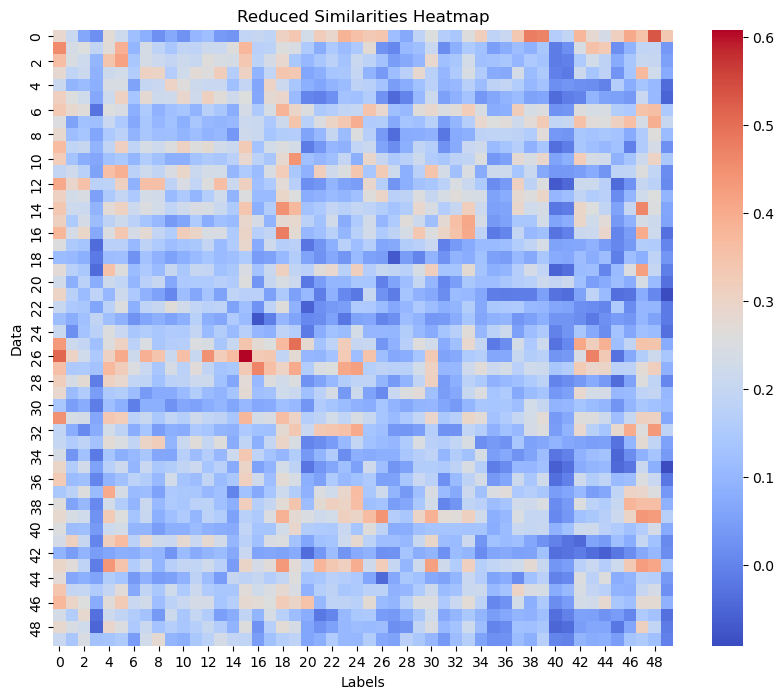

In [ ]:
reduced_similarities = similarities[:50, :50] 

plt.figure(figsize=(10, 8))
sns.heatmap(reduced_similarities, cmap='coolwarm', cbar=True)
plt.title("Reduced Similarities Heatmap")
plt.xlabel("Labels")
plt.ylabel("Data")
plt.show()

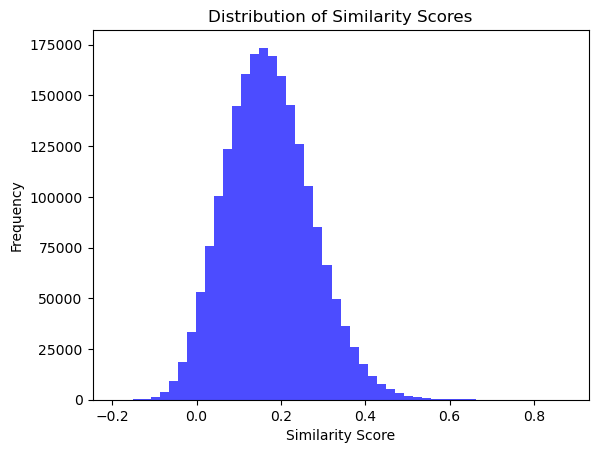

In [ ]:
flattened_similarities = similarities.flatten()
plt.hist(flattened_similarities, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def get_top_labels(similarities, labels, top_n=3):
    top_indices = np.argsort(similarities, axis=1)[:, -top_n:][:, ::-1]
    top_labels = [[labels[i] for i in indices] for indices in top_indices]
    top_labels_with_scores = [[(labels[i], similarities[row_idx, i]) for i in indices] for row_idx, indices in enumerate(top_indices)]
    return top_labels_with_scores

In [ ]:
similarities_array = np.vstack(similarities[:data.shape[0]])

In [ ]:
data['top_labels'] = get_top_labels(similarities_array, labels['label'].tolist(), top_n=3)

In [ ]:
data[['description', 'business_tags', 'top_labels']].to_csv('../CSV/Tries/labelled_data_sbert2.csv', index=False)